# **DWTX vs. ELAB**


## **A Gainer vs. A Loser?**  
A gainer stock such as DWTX is what investor will refer as due to their nature in being able to show postive movement in their stock price while a loser like ELAB tend to show movement going downwards.

Being able to track and analyze these two stocks can tell inventors which stock they want to invest in depending on what **risk, reward, and market behavior** they might have. Obviously, no one would want to invest in a stock where it would lose value, and that's we will be figuring out.

---

# **Data Preparation and Cleaning for Stock Prices**

In [729]:
# Import necessary libraries
import pandas as pd
import json

In [730]:
# Define the file path to the JSON data
dwtx_file_path = 'Stock_data/dwtx_data.json'
elab_file_path = 'Stock_data/elab_data.json'

In [731]:
# Open and load the JSON file into a Python dictionary
with open(dwtx_file_path, 'r') as json_file:
    dwtx_stock_data = json.load(json_file)  # Load JSON data


with open(elab_file_path, 'r') as json_file:
    elab_stock_data = json.load(json_file)  # Load JSON data


In [732]:
# Convert the JSON data into a Pandas DataFrame
dwtx_df = pd.DataFrame(dwtx_stock_data)
elab_df = pd.DataFrame(elab_stock_data)

In [733]:
dwtx_df

,Date,Open,High,Low,Close,Volume,Symbol
0,2020-12-17,12.1500,16.7100,10.3000,16.71,15921710.0,DWTX
1,2020-12-18,13.7600,14.3900,10.4000,10.40,5085960.0,DWTX
2,2020-12-21,10.3452,10.5999,9.2601,9.80,1436021.0,DWTX
3,2020-12-22,9.6600,9.7500,8.7000,8.90,1132028.0,DWTX
4,2020-12-23,9.2150,10.8000,8.9300,9.49,1637798.0,DWTX
...,...,...,...,...,...,...,...
1027,2025-01-22,2.7600,3.1900,2.6000,2.80,654620.0,DWTX
1028,2025-01-23,2.7200,29.2800,2.7200,13.35,102194631.0,DWTX
1029,2025-01-24,17.4900,19.3300,10.1000,11.40,8162763.0,DWTX
1030,2025-01-27,9.4000,21.7800,9.4000,17.40,15118929.0,DWTX


In [734]:
elab_df

,Date,Open,High,Low,Close,Volume,symbol
0,2023-11-21,4.00,4.0000,3.1000,3.40,730073.0,ELAB
1,2023-11-22,3.50,3.6800,3.3000,3.47,201166.0,ELAB
2,2023-11-24,3.65,3.9300,3.5701,3.70,86528.0,ELAB
3,2023-11-27,3.72,4.2442,3.4700,3.98,633866.0,ELAB
4,2023-11-28,4.01,4.1500,3.7500,4.04,343773.0,ELAB
...,...,...,...,...,...,...,...
291,2025-01-22,2.11,2.1100,2.0100,2.01,129113.0,ELAB
292,2025-01-23,2.01,2.0500,1.9500,1.98,144456.0,ELAB
293,2025-01-24,3.96,4.0700,2.7800,3.10,77204170.0,ELAB
294,2025-01-27,1.98,2.1000,1.6800,2.05,3732922.0,ELAB


In [735]:
# Sort both DataFrames by date to ensure chronological order
dwtx_df = dwtx_df.sort_values(by='Date')
elab_df = elab_df.sort_values(by='Date')

In [736]:
# Display the first few rows of each DataFrame to verify the data separation
print("DWTX Data:")
print(dwtx_df.head())  

print("ELAB Data:")
print(elab_df.head()) 

DWTX Data:
         Date     Open     High      Low  Close      Volume Symbol
0  2020-12-17  12.1500  16.7100  10.3000  16.71  15921710.0   DWTX
1  2020-12-18  13.7600  14.3900  10.4000  10.40   5085960.0   DWTX
2  2020-12-21  10.3452  10.5999   9.2601   9.80   1436021.0   DWTX
3  2020-12-22   9.6600   9.7500   8.7000   8.90   1132028.0   DWTX
4  2020-12-23   9.2150  10.8000   8.9300   9.49   1637798.0   DWTX
ELAB Data:
         Date  Open    High     Low  Close    Volume symbol
0  2023-11-21  4.00  4.0000  3.1000   3.40  730073.0   ELAB
1  2023-11-22  3.50  3.6800  3.3000   3.47  201166.0   ELAB
2  2023-11-24  3.65  3.9300  3.5701   3.70   86528.0   ELAB
3  2023-11-27  3.72  4.2442  3.4700   3.98  633866.0   ELAB
4  2023-11-28  4.01  4.1500  3.7500   4.04  343773.0   ELAB


In [737]:
# Ensure 'Date' is in datetime format
dwtx_df['Date'] = pd.to_datetime(dwtx_df['Date'])
elab_df['Date'] = pd.to_datetime(elab_df['Date'])

# Set 'Date' as index only if it's not already
if 'Date' in dwtx_df.columns:
    dwtx_df.set_index('Date', inplace=True)
if 'Date' in elab_df.columns:
    elab_df.set_index('Date', inplace=True)

In [738]:
# Select only required columns
dwtx_ohlc = dwtx_df[['Open', 'High', 'Low', 'Close', 'Volume']]
elab_ohlc = elab_df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [739]:
# Convert OHLC and Volume columns to numeric
dwtx_ohlc = dwtx_ohlc.astype({'Open': 'float', 'High': 'float', 
                              'Low': 'float', 'Close': 'float', 
                              'Volume': 'float'})

elab_ohlc = elab_ohlc.astype({'Open': 'float', 'High': 'float', 
                              'Low': 'float', 'Close': 'float', 
                              'Volume': 'float'})

In [740]:
print(dwtx_ohlc.dtypes)
print(elab_ohlc.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


- In both data sets for **DWTX** and **ELAB**, the data was cleaned and organized to show **Open, High, Low, Close, and Volume**

---



# **DWTX Stock Price Analysis**
## **Overview**
For the first part of the analysis, we are visualizing the price of DLAB stocks with a candlestick chart that measure in both a year and quarterly level.
This visualization can show us...
- **Price fluctuations** over time.
- **Volume trends** to understand trading activity.
- Potential **spikes or volatility** that might indicate significant events.

We can observe key price movements and trading behaviors to assist in making informed financial decisions.


In [741]:
# Import necessary libraries
import mplfinance as mpf
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

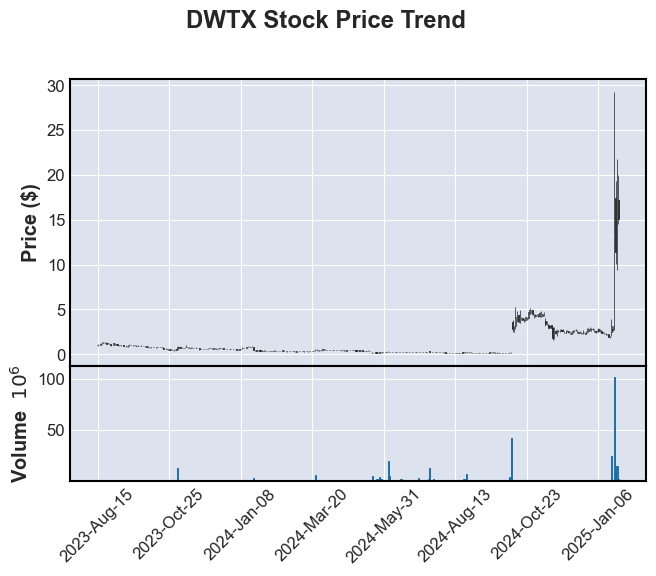

In [742]:
# Plot candlestick chart on a year level
mpf.plot(dwtx_ohlc.tail(365), type='candle', volume=True, title="DWTX Stock Price Trend", ylabel="Price ($)")
mpf.show()

# **Key Takeaways: DWTX Annual Stock Price Trend**

### 1️. **Stable Price**
-The stock price for DWTX has been consistent from the start up until recently in September 2024, we can see a positive jump, and an even bigger spike as of recently 

### 2️. **Volume**
- There was a few increase of volume during it's consistent stock price time, but there were also large volume increase which was caused by the price spikes.

### 3️. **Volatility**
- The sudden change in stock price was able to set off the volatility in this stock, before it was stable and consistent. Now the stock has been showing movement.

---


In [743]:
# Generate separate candlestick plots for each quarter of DWTX
# Define custom market colors and chart style
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [744]:
# Convert Date index to datetime format (if not already converted)
dwtx_ohlc.index = pd.to_datetime(dwtx_ohlc.index)

In [745]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Plots the candlestick chart for a given quarter.

    Parameters:
    - title: Title of the plot (e.g., "Q1 2024")
    - year: Year to filter data
    - months: List of months in the quarter
    - extra_year: Additional year if needed (e.g., extending Q4 into January)
    - extra_months: Extra months from the additional year
    """

    # Filter the data for the given year and months
    quarter_data = dwtx_ohlc[(dwtx_ohlc.index.year == year) & (dwtx_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending to January of next year)
    if extra_year and extra_months:
        extra_data = dwtx_ohlc[(dwtx_ohlc.index.year == extra_year) & (dwtx_ohlc.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()  # Merge and sort

    # If there is no data for the selected period, print a message and return
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Plot candlestick chart for the selected quarter
    fig, ax = mpf.plot(quarter_data, type='candle', volume=True,
                       title=f"DWTX Stock Price Trend ({title})",
                       ylabel="Price ($)",
                       xlabel="Date",
                       style=s,
                       mav=(10, 20, 50),  # Moving Averages (10-day, 20-day, 50-day)
                       figsize=(10, 6),
                       tight_layout=True,
                       returnfig=True)

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

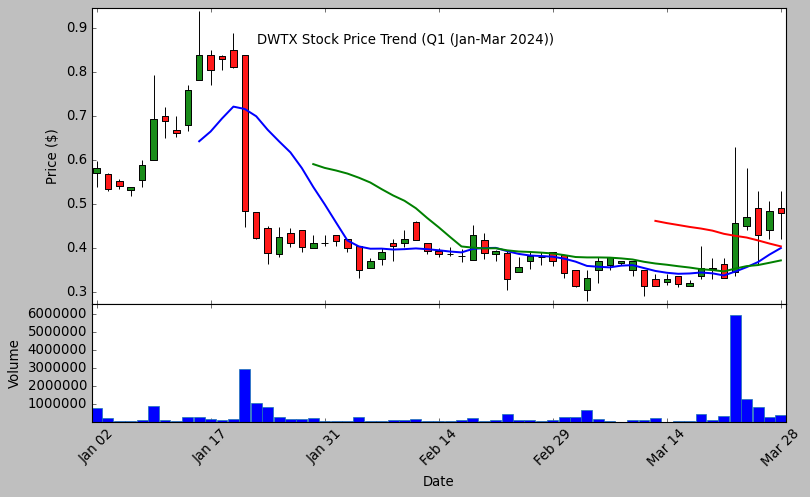

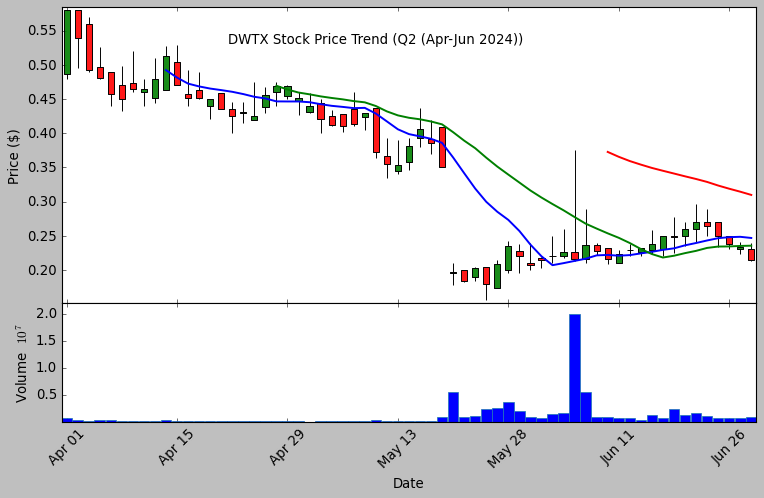

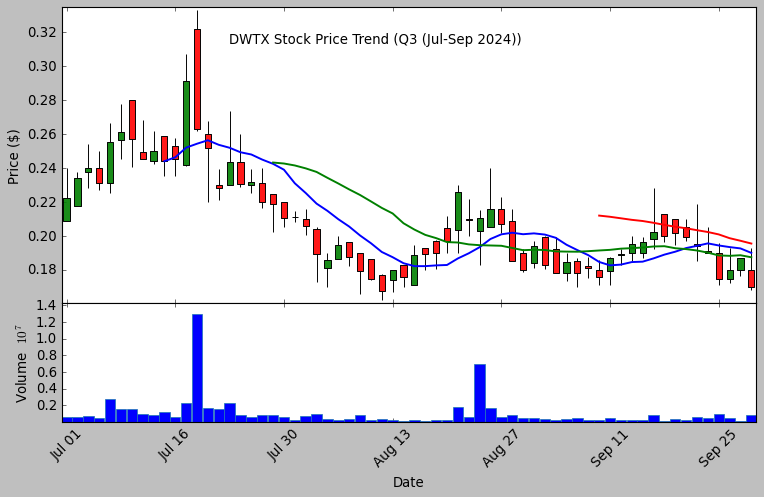

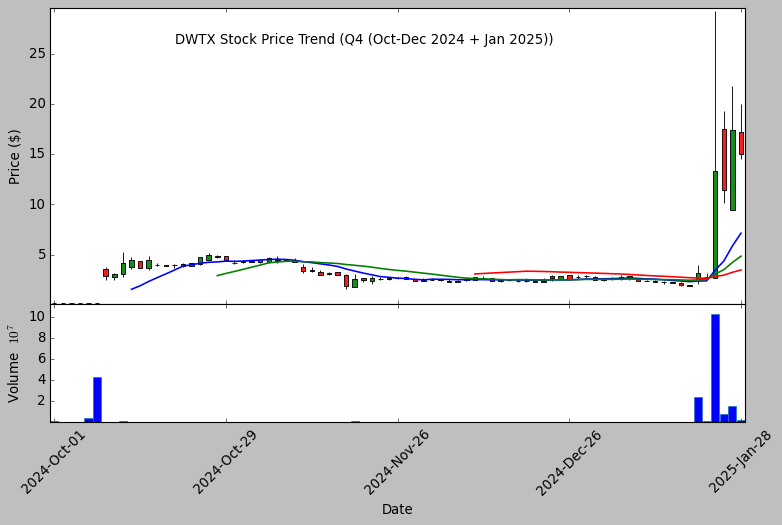

In [746]:
# Generate candlestick charts for each quarter of 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3])    # First quarter
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])    # Second quarter
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])    # Third quarter
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  
# Fourth quarter extends to January 2025

# **📊 Key Takeaways from DWTX's Quarterly Stock Price Trends**

### **Q1 (Jan-Mar 2024)**
- There was a sudden drop of price in early quarter
- It became stable after the sudden drop but still showing it in the negative direction
- near the end of the quarter we can see that it just starting to make positive movement.

### **Q2 (Apr-Jun 2024)**
- This quarter showed the stock price making negative movment, followed by a small price drop in middle quarter
- Once stabilized, we are able to see an increase in volume which could mean investors were interested once they found that the stock would not be risky.

### **Q3 (Jul-Sep 2024)**
- The stock price had steady increase before dropping again.
- After that, the price has not been somewhat stable as it is making both positive and negative movements equally.

### **Q4 (Oct-Dec 2024) + Jan 2025**
- The price has been really stable based on this perspective because there was a huge price spike in January.

### **Overall Insights**
- During the first 4 quarters we can relatively see that the stock price has no big movements and has remained stable.
- Suddenly when the new year began, stock price spiked up and set off votalitity. 

---



# **ELAB Stock Price Analysis**
## **Overview**
Continuing the same analysis and visualization, we are not making a same candestick graph for ELAB to help us analyze the stock price.

This visualization can show us...
- **Price fluctuations** over time.
- **Volume trends** to understand trading activity.
- Potential **spikes or volatility** that might indicate significant events.

We can observe key price movements and trading behaviors to assist in making informed financial decisions.


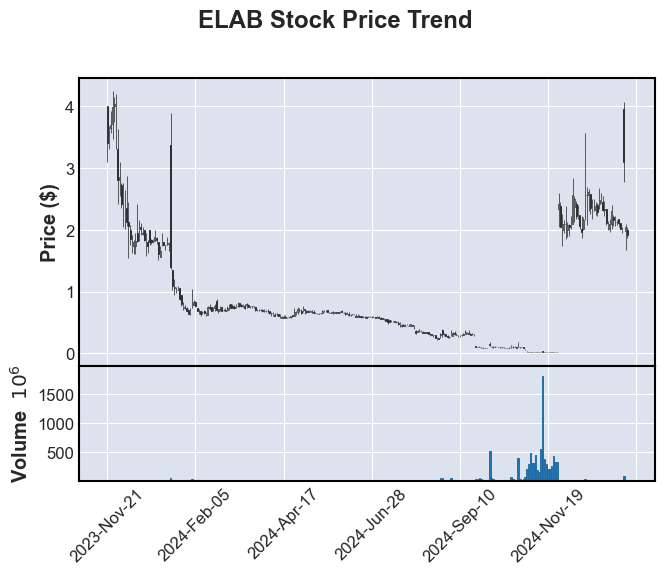

In [747]:
# Plot candlestick chart
mpf.plot(elab_ohlc, type='candle', volume=True, title="ELAB Stock Price Trend", ylabel="Price ($)")
mpf.show()

# **Key Takeaways: DWTX Annual Stock Price Trend**

### 1️. **Stability**
- Stock price of ELAB has shown negative movements for the most part. 
- It is not able to be at a stable state.

### 2️. **Volume**
- There was no increase in volume during the whole time the stock price was decreasing.
- Only when the price shot up in a spike did an increase of volume followed.

### 3️. **Volatility**
- There is some volatitity, ther has been a big spike during the time the price was decreasing, and again in mid November
- I found it interesting that there was no increase of volume when there was a spike in December 2023.
---


In [748]:
# Generate separate candlestick plots for each quarter of DWTX
# Define market colors and style for visualization
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='blue')
s = mpf.make_mpf_style(base_mpl_style='classic', marketcolors=mc)

In [749]:
# Convert Date index to datetime format 
elab_ohlc.index = pd.to_datetime(elab_ohlc.index)

In [750]:
# Function to filter and plot data for each quarter
def plot_quarter(title, year, months, extra_year=None, extra_months=None):
    """
    Filters and plots ELAB stock data for a given quarter.

    Parameters:
    - title: Title of the plot
    - year: Year to filter data
    - months: List of months to include
    - extra_year: Additional year to include for extended periods (optional)
    - extra_months: Additional months from extra_year (optional)
    """
    
    # Filter data for the specified quarter and year
    quarter_data = elab_ohlc[(elab_ohlc.index.year == year) & (elab_ohlc.index.month.isin(months))]

    # If extra months from another year are needed (e.g., Q4 extending into January of the next year)
    if extra_year and extra_months:
        extra_data = elab_ohlc[(elab_ohlc.index.year == extra_year) & (elab_ohlc.index.month.isin(extra_months))]
        quarter_data = pd.concat([quarter_data, extra_data]).sort_index()

    # If no data is found for the given period, print a message and exit function
    if quarter_data.empty:
        print(f"No data for {title}")
        return

    # Generate candlestick plot with volume
    fig, ax = mpf.plot(
        quarter_data, type='candle', volume=True,
        title=f"ELAB Stock Price Trend ({title})",
        ylabel="Price ($)",
        xlabel="Date",
        style=s,
        mav=(10, 20, 50),  # Moving Averages: 10-day, 20-day, 50-day
        figsize=(10,6),
        tight_layout=True,
        returnfig=True  # Returns figure and axis for further customization
    )

    # Rotate x-axis labels for better readability
    fig.autofmt_xdate()

    # Show the plot
    plt.show()

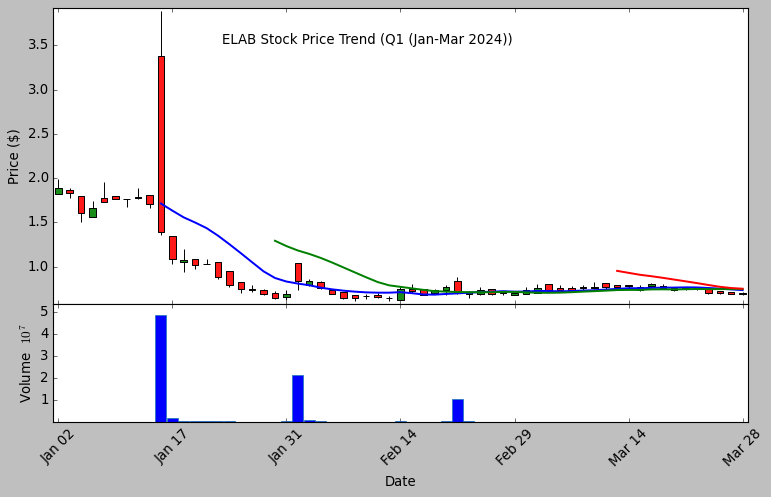

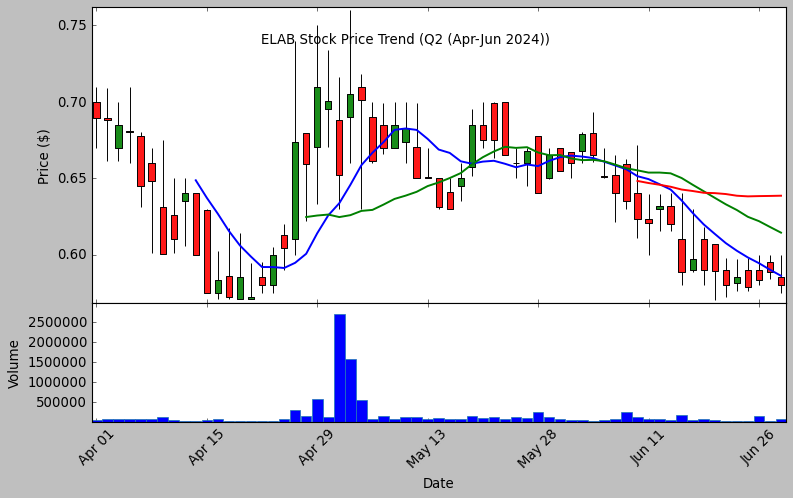

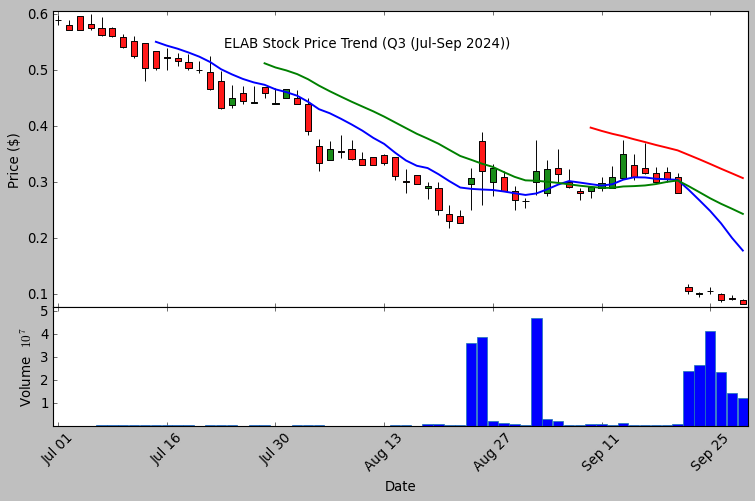

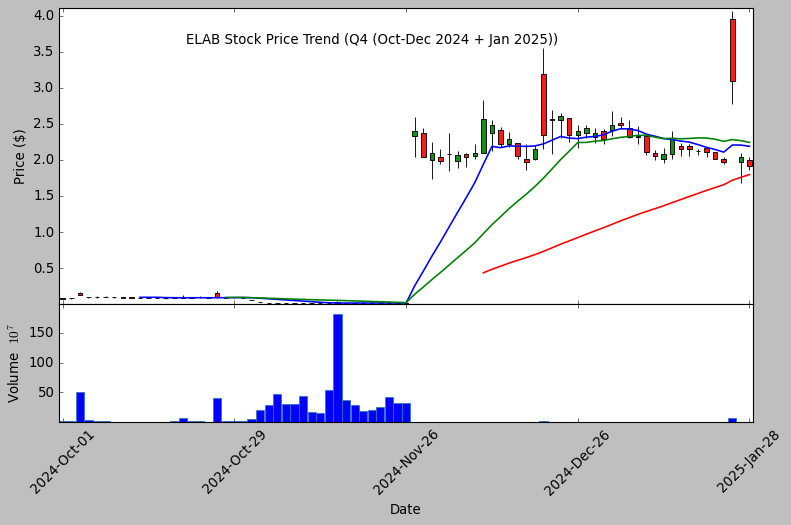

In [751]:
# Generate separate plots for each quarter in 2024
plot_quarter("Q1 (Jan-Mar 2024)", 2024, [1, 2, 3]) 
plot_quarter("Q2 (Apr-Jun 2024)", 2024, [4, 5, 6])
plot_quarter("Q3 (Jul-Sep 2024)", 2024, [7, 8, 9])
plot_quarter("Q4 (Oct-Dec 2024 + Jan 2025)", 2024, [10, 11, 12], extra_year=2025, extra_months=[1])  # Jan 2025 only appears in Q4

# **📊 Key Takeaways from DWTX's Quarterly Stock Price Trends**

### **Q1 (Jan-Mar 2024)**
- With some decrease, the price has been kept stable.

### **Q2 (Apr-Jun 2024)**
- Stock price has been both decrease and increasing.
- Volume increased when stock price increased, but none during other times in the quarter

### **Q3 (Jul-Sep 2024)**
- For Q3, the stock price has been gradually decreasing.
- It only stabilizes at the end of the quarter.

### **Q4 (Oct-Dec 2024) + Jan 2025**
- For the first half, it price has been very stable.
- the price increased during halfway and has been trying to stable after that.

### **Overall Insights**
- As mentioned before, the stock price has been decreasing for the most part, and then a suddeny price increase in November.

---



# **Volatility & Risk Analysis**

### 1️. Standard Deviation of Returns (Volatility)
- The **standard deviation of daily returns** is used to calculate and compare the volatility between stocks
- A **bar chart** visualizes which stock exhibits higher volatility.
- This helps assess the relative risk profile of both stocks.

### 2️. Rolling Volatility
- A **rolling standard deviation** is computed to track volatility trends over time.
- The **line plot** compares fluctuations in risk for both stocks.
- This helps identify **periods of high volatility** and potential market-moving events.

In [752]:
start_date = "2024-08-22"
dwtx_filtered = dwtx_ohlc.loc[start_date:].copy()
elab_filtered = elab_ohlc.loc[start_date:].copy()

In [753]:
# Compute daily returns
dwtx_filtered['Daily Return'] = dwtx_filtered['Close'].pct_change()
elab_filtered['Daily Return'] = elab_filtered['Close'].pct_change()

In [754]:
# Calculate standard deviation of returns (volatility)
dwtx_volatility = dwtx_filtered['Daily Return'].std()
elab_volatility = elab_filtered['Daily Return'].std()

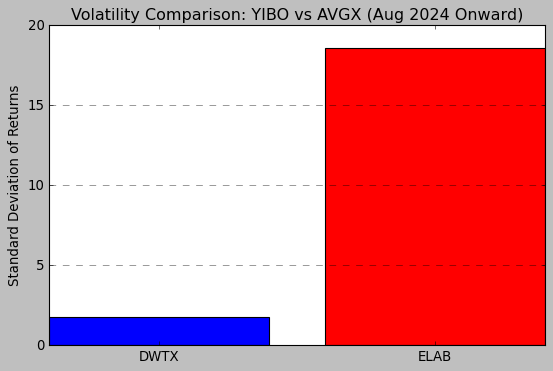

In [755]:
# Plot adjusted volatility comparison
plt.figure(figsize=(8, 5))
plt.bar(['DWTX', 'ELAB'], [dwtx_volatility, elab_volatility], color=['blue', 'red'])
plt.ylabel('Standard Deviation of Returns')
plt.title('Volatility Comparison: YIBO vs AVGX (Aug 2024 Onward)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Key Takeaways: Volatility Comparison**

### Observations:
- ELAB shows significantly more Standard deviation of returns than DWTX. This means that the volatility is significantly higher as well as the two values
- The ELAB stock prices has shown more movements whether it be good or bad. Volatility could be good, but it is more risky. And based on the prevous trends, it mightn not end well with ELAB.
- Since DWTX has a much lower return, this means it has a very low volatility. Making DWTX a very stable stock.



---

In [756]:
# Set the start date for filtering
start_date = "2024-08-22"

# Filter data and create copies
dwtx_filtered = dwtx_ohlc.loc[start_date:].copy()
elab_filtered = elab_ohlc.loc[start_date:].copy()

In [757]:
# Compute daily returns
dwtx_filtered['Daily Return'] = dwtx_filtered['Close'].pct_change()
elab_filtered['Daily Return'] = elab_filtered['Close'].pct_change()

In [758]:
# Compute rolling standard deviation (volatility)
dwtx_filtered['Rolling Volatility'] = dwtx_filtered['Daily Return'].rolling(window=30).std()
elab_filtered['Rolling Volatility'] = elab_filtered['Daily Return'].rolling(window=30).std()

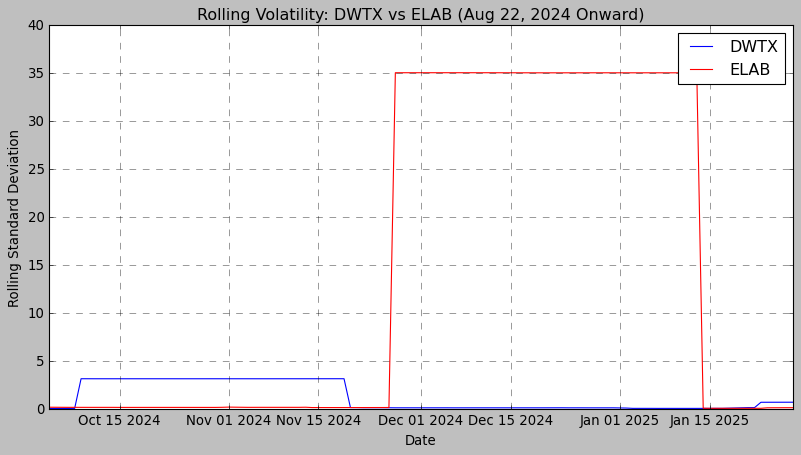

In [759]:
# Plot rolling volatility for both stocks
plt.figure(figsize=(12, 6))
plt.plot(dwtx_filtered.index, dwtx_filtered['Rolling Volatility'], label='DWTX', color='blue')
plt.plot(elab_filtered.index, elab_filtered['Rolling Volatility'], label='ELAB', color='red')

# Formatting the plot
plt.title('Rolling Volatility: DWTX vs ELAB (Aug 22, 2024 Onward)')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

# **Key Takeaways: Rolling Voltality (DWTX vs ELAB)**

---

## **🚀 Analyzing YIBO & AVGX Against a Market Index**
To gain a deeper understanding of the performance and volatility of **YIBO** and **AVGX**, we are incorporating a **market index** for comparison. By analyzing these stocks against the **S&P 500 ETF (SPY)**, we can assess how they move in relation to the broader market and identify potential correlations.

### Approach:
1. **Fetching Market Index Data:**
   - We are using the **Alpha Vantage API** to retrieve historical daily adjusted closing prices for SPY.
   - The API request pulls a complete dataset, which is then **stored as a JSON file** for further analysis.

2. **Comparative Analysis:**
   - The market index data will be used to evaluate how **YIBO and AVGX perform relative to broader market trends**.
   - We will investigate **volatility patterns, correlations, and potential deviations** from the overall market behavior.
   - The findings will help determine whether these stocks tend to **move with or against the market**, which is crucial for risk assessment and investment strategy.

By integrating SPY as a benchmark, we aim to **contextualize the movements of YIBO and AVGX** within a larger economic framework.

In [760]:
# Install Alpha Vantage
# if needed - %pip install alpha_vantage

In [761]:
# Import necessary libraries for fetching and processing market data
from alpha_vantage.timeseries import TimeSeries
import requests
import json
import pandas as pd

In [762]:
# Import the API key securel
# Sorry, I initially meant vantage..
from david_apikey import alphavantage_apikey

In [763]:
# Define the market index symbol (S&P 500 ETF - SPY)
symbol = "SPY"

In [764]:
# Construct the API request URL to fetch daily adjusted closing prices
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api'

In [765]:
# Send a GET request to the Alpha Vantage API to fetch market data
r = requests.get(url)

In [766]:
# Parse the JSON response from the API
data = r.json()

In [767]:
# Print a confirmation message along with the requested URL
print(f"Fetching data from URL: {url}")

Fetching data from URL: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SPY&outputsize=full&apikey=alpha_advantage_api


In [768]:
# Print the raw API response (JSON format) for verification
print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'SPY', '3. Last Refreshed': '2025-01-31', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-01-31': {'1. open': '607.5000', '2. high': '609.9600', '3. low': '601.0500', '4. close': '601.8200', '5. volume': '66671471'}, '2025-01-30': {'1. open': '603.9600', '2. high': '606.6000', '3. low': '600.7150', '4. close': '605.0400', '5. volume': '39281255'}, '2025-01-29': {'1. open': '603.7200', '2. high': '604.1300', '3. low': '599.2200', '4. close': '601.8100', '5. volume': '37177429'}, '2025-01-28': {'1. open': '600.6200', '2. high': '605.3700', '3. low': '597.2500', '4. close': '604.5200', '5. volume': '44433322'}, '2025-01-27': {'1. open': '594.8100', '2. high': '599.6900', '3. low': '594.6400', '4. close': '599.3700', '5. volume': '70361125'}, '2025-01-24': {'1. open': '609.8100', '2. high': '610.7800', '3. low': '606.8000', '4. close': '607.9700', '

In [769]:
# Save the retrieved market index data to a JSON file for further analysis
with open('market_index_data.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

# Confirm that the market data has been successfully saved
print("Market index data saved to market_index_data.json")

Market index data saved to market_index_data.json


## **Processing Market Index Data for Comparative Analysis**

### Objective:
To compare **YIBO** and **AVGX** against the **market index (S&P 500 ETF - SPY)**, the market index data retrieved from **Alpha Vantage** must be cleaned and formatted.

### Approach:
- **Load and Convert Data:**  
  Read the JSON file containing historical market index data and convert it into a **Pandas DataFrame** for further manipulation.

- **Data Cleaning & Formatting:**  
  Rename columns for clarity, convert the **date index into a proper datetime format**, and reset the index so that **dates become a separate column**.

- **Filtering for Relevant Dates:**  
  Since **AVGX** IPOed on **August 22, 2024**, the data is filtered starting from **August 23, 2024**, to match the period analyzed for the individual stocks.

With this structured approach, the market index data will be **ready for comparative analysis** with YIBO and AVGX.

In [770]:
# Define the file path for the market index JSON data
file_path = 'market_index_data.json'

In [771]:
# Open and load the JSON data into a Python dictionary
with open(file_path, 'r') as json_file:
    market_data = json.load(json_file)

In [772]:
# Extract the "Time Series (Daily)" data and convert it into a Pandas DataFrame
market_index_df = pd.DataFrame.from_dict(market_data['Time Series (Daily)'], orient='index')

In [773]:
# Rename the column for closing price to "Market Close" and convert it to float
market_index_df = market_index_df.rename(columns={"4. close": "Market Close"}).astype(float)

In [774]:
# Rename all columns for better readability
market_index_df.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Market Close",
    "5. volume": "Volume"
}, inplace=True)

In [775]:
# Convert the index (which contains dates as strings) into proper datetime format
market_index_df.index = pd.to_datetime(market_index_df.index)

In [776]:
# Reset the index so that dates become a separate column
market_index_df = market_index_df.reset_index()

# Rename the new date column for clarity
market_index_df.rename(columns={'index': 'Date'}, inplace=True)

# Display the DataFrame to check the result# Display the first few rows to verify the cleaned dataset

In [777]:
# Filter the dataset to include only records from August 23, 2024, onward
filtered_market_index_df = market_index_df[market_index_df['Date'] >= '2024-08-23']

In [778]:
# Display the filtered DataFrame
print(filtered_market_index_df)

          Date    Open    High      Low  Market Close      Volume
0   2025-01-31  607.50  609.96  601.050        601.82  66671471.0
1   2025-01-30  603.96  606.60  600.715        605.04  39281255.0
2   2025-01-29  603.72  604.13  599.220        601.81  37177429.0
3   2025-01-28  600.62  605.37  597.250        604.52  44433322.0
4   2025-01-27  594.81  599.69  594.640        599.37  70361125.0
..         ...     ...     ...      ...           ...         ...
105 2024-08-29  560.31  563.68  557.180        558.35  38715176.0
106 2024-08-28  561.21  561.65  555.040        558.30  41066024.0
107 2024-08-27  559.49  562.06  558.320        561.56  32693898.0
108 2024-08-26  563.18  563.91  559.050        560.79  35788609.0
109 2024-08-23  559.53  563.09  557.290        562.13  50639393.0

[110 rows x 6 columns]


## **Finalizing Market Index Data for Analysis**

With the market index data successfully processed, the dataset now contains:  
✔ **Clean and structured data** with clear column names.  
✔ **Dates properly formatted** to align with YIBO and AVGX stock data.  
✔ **Filtered data starting from August 23, 2024**, ensuring consistency in analysis.

This dataset will now be used to **compare stock performance, volatility, and correlation** against broader market trends.

In [779]:
#if needed pip install yfinance

In [780]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [781]:
# Fetch YIBO data
dwtx = yf.download("DWTX", start="2024-08-23")

# Fetch AVGX data
elab = yf.download("ELAB", start="2024-08-23")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [782]:
# Calculate daily returns
dwtx['Daily Return'] = dwtx['Close'].pct_change()
elab['Daily Return'] = elab['Close'].pct_change()

In [783]:
print(dwtx[['Close', 'Daily Return']].head())
print(elab[['Close', 'Daily Return']].head())

Price       Close Daily Return
Ticker       DWTX             
Date                          
2024-08-23  5.275          NaN
2024-08-26  5.400     0.023697
2024-08-27  5.175    -0.041667
2024-08-28  4.625    -0.106280
2024-08-29  4.500    -0.027027
Price           Close Daily Return
Ticker           ELAB             
Date                              
2024-08-23  61.400002          NaN
2024-08-26  64.000000     0.042345
2024-08-27  65.000000     0.015625
2024-08-28  57.000000    -0.123077
2024-08-29  53.599998    -0.059649


# **MARKET INDEX FILTERED DF CLEANING**

In [784]:
# Filter data between August 23, 2024, and January 29, 2025
filtered_market_index_df = market_index_df[
    (market_index_df['Date'] >= '2024-08-23') & 
    (market_index_df['Date'] <= '2025-01-29')
].copy()

In [785]:
# Convert 'Market Close' column to numeric format for calculations
filtered_market_index_df['Market Close'] = pd.to_numeric(
    filtered_market_index_df['Market Close'], errors='coerce'
)

In [786]:
# Calculate Market Return as the percentage change in 'Market Close'
filtered_market_index_df['Market Return'] = filtered_market_index_df['Market Close'].pct_change()

In [787]:
# Sort the DataFrame by Date in ascending order
filtered_market_index_df = filtered_market_index_df.sort_values(by='Date', ascending=True)

In [788]:
# Reset index to ensure proper alignment and display
filtered_market_index_df = filtered_market_index_df.reset_index(drop=True)

In [789]:
# Reorder columns so 'Date' is the first column
column_order = ['Date', 'Open', 'High', 'Low', 'Market Close', 'Volume', 'Market Return']
filtered_market_index_df = filtered_market_index_df[column_order]

In [790]:
# Assign a new numerical index for readability
filtered_market_index_df.index = range(1, len(filtered_market_index_df) + 1)

In [791]:
# Convert index to datetime format
filtered_market_index_df.index = pd.to_datetime(filtered_market_index_df.index)

In [792]:
filtered_market_index_df

,Date,Open,High,Low,Market Close,Volume,Market Return
1970-01-01 00:00:00.000000001,2024-08-23,559.53,563.09,557.29,562.13,50639393.0,0.002389
1970-01-01 00:00:00.000000002,2024-08-26,563.18,563.91,559.05,560.79,35788609.0,-0.001371
1970-01-01 00:00:00.000000003,2024-08-27,559.49,562.06,558.32,561.56,32693898.0,0.005839
1970-01-01 00:00:00.000000004,2024-08-28,561.21,561.65,555.04,558.30,41066024.0,-0.000090
1970-01-01 00:00:00.000000005,2024-08-29,560.31,563.68,557.18,558.35,38715176.0,-0.009456
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000104,2025-01-23,605.80,609.75,605.52,609.75,41152102.0,0.002928
1970-01-01 00:00:00.000000105,2025-01-24,609.81,610.78,606.80,607.97,34604693.0,0.014348
1970-01-01 00:00:00.000000106,2025-01-27,594.81,599.69,594.64,599.37,70361125.0,-0.008519
1970-01-01 00:00:00.000000107,2025-01-28,600.62,605.37,597.25,604.52,44433322.0,0.004503


- Tracking the historical performance of a market index provides valuable insight into broader trends. A dataset filtered from August 23, 2024, to January 29, 2025, captures key trading metrics during this period. Price movements, trading volume, and market returns reveal patterns that help measure stability and risk.

- Comparing this dataset with individual stock performance requires structural consistency. Ensuring proper formatting allows for accurate statistical analysis. Market returns reflect fluctuations that influence investment decisions, and matching this with stock data enables a deeper understanding of risk exposure.

- Evaluating volatility remains a priority. Identifying shifts in market conditions helps refine stock comparisons. Establishing a reliable framework for analysis ensures that data-driven conclusions are well-supported. Adjustments to the dataset will maintain clarity and accuracy, reinforcing its role in financial evaluation.

# **YIBO DF CLEANING**

In [793]:
# Flatten the multi-index column names if necessary
dwtx.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in dwtx.columns]

In [794]:
# Drop unnecessary index columns if they exist 
   # columns_to_drop = ['level_0', 'index'] 
   # dwtx = dwtx.drop(columns=[col for col in columns_to_drop if col in dwtx.columns])

In [795]:
# Reset index to move Date into a regular column 
dwtx.reset_index(inplace=True)

In [796]:
# Convert index to datetime format
dwtx.index = pd.to_datetime(dwtx.index)

In [797]:
# Filter to only keep rows where Date is within the desired range
dwtx = dwtx[dwtx['Date'] <= '2025-01-29']

In [798]:
dwtx

,Date,Close_DWTX,High_DWTX,Low_DWTX,Open_DWTX,Volume_DWTX,Daily Return_
1970-01-01 00:00:00.000000000,2024-08-23,5.275,5.375000,4.575,5.075000,277908,NaN
1970-01-01 00:00:00.000000001,2024-08-26,5.400,6.000000,5.125,5.125000,65428,0.023697
1970-01-01 00:00:00.000000002,2024-08-27,5.175,5.575000,5.050,5.400000,23304,-0.041667
1970-01-01 00:00:00.000000003,2024-08-28,4.625,5.400000,4.625,5.225000,31880,-0.106280
1970-01-01 00:00:00.000000004,2024-08-29,4.500,4.800000,4.475,4.750000,17480,-0.027027
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000103,2025-01-23,13.350,29.280001,2.720,2.720000,103459300,3.767857
1970-01-01 00:00:00.000000104,2025-01-24,11.400,19.330000,10.100,17.490000,8162800,-0.146067
1970-01-01 00:00:00.000000105,2025-01-27,17.400,21.780001,9.400,9.400000,15118900,0.526316
1970-01-01 00:00:00.000000106,2025-01-28,15.060,20.000000,14.500,17.190001,1871200,-0.134483


In [799]:
print(dwtx.columns)

Index(['Date', 'Close_DWTX', 'High_DWTX', 'Low_DWTX', 'Open_DWTX',
       'Volume_DWTX', 'Daily Return_'],
      dtype='object')


In [800]:
print(dwtx.index.dtype)  
print(filtered_market_index_df.index.dtype)

datetime64[ns]
datetime64[ns]


- A structured dataset serves as the foundation for analyzing YIBO’s performance within a defined period. Ensuring data consistency requires adjusting column formats and filtering based on relevant time frames. Proper indexing, along with column restructuring, establishes the framework for meaningful comparisons.

- Formatting steps include eliminating redundant index columns, standardizing date formats, and confirming that the dataset aligns with broader market data. A direct comparison between YIBO and the market index necessitates these adjustments, allowing for accurate statistical evaluations such as return correlations and volatility assessments.

- Examining the filtered data provides insight into YIBO’s price trends, volume fluctuations, and return behavior. Ensuring alignment between the YIBO dataset and the market index supports a broader risk assessment framework, helping to contextualize stock behavior within overall market conditions.

---

# **📊 Understanding YIBO's Beta: Market Sensitivity Analysis**

Before diving into the visualization, the **Beta value** for YIBO is determined to assess how the stock moves in relation to the overall market. This is accomplished by calculating the **covariance between YIBO’s daily returns and market returns**, then dividing it by the **variance of market returns**. 

A regression analysis follows, where **YIBO’s daily returns** are plotted against **market returns** to visualize the relationship. The **slope of the regression line represents the Beta value**, quantifying YIBO’s risk exposure relative to the market.

In [801]:
# Merge YIBO with Market Index on Date
dwtx_merged_data = pd.merge(dwtx[['Date', 'Daily Return_']],
                       filtered_market_index_df[['Date', 'Market Return']], 
                       on='Date', how='inner')

In [802]:
# Rename columns for clarity
dwtx_merged_data.rename(columns={'Daily Return_': 'DWTX Daily Return'}, inplace=True)

In [803]:
# Display first few rows
print(dwtx_merged_data.head())

        Date  DWTX Daily Return  Market Return
0 2024-08-23                NaN       0.002389
1 2024-08-26           0.023697      -0.001371
2 2024-08-27          -0.041667       0.005839
3 2024-08-28          -0.106280      -0.000090
4 2024-08-29          -0.027027      -0.009456


In [804]:
# Compute covariance matrix
cov_matrix = dwtx_merged_data[['DWTX Daily Return', 'Market Return']].cov()

# Extract covariance of YIBO vs. Market
cov_dwtx_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
dwtx_beta = cov_dwtx_market / var_market

In [805]:
# Print Beta value
print(f"DWTX Beta: {dwtx_beta:.3f}")

DWTX Beta: 0.099


In [806]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

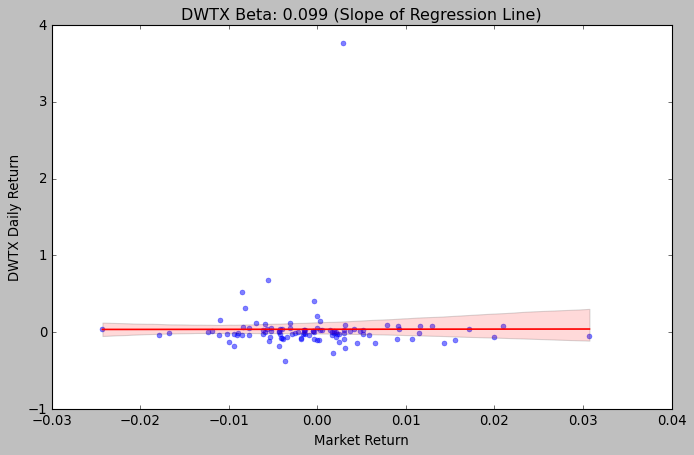

In [807]:
# Compute Beta
beta_value = dwtx_merged_data[['DWTX Daily Return', 'Market Return']].cov().iloc[0, 1] / dwtx_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=dwtx_merged_data['Market Return'], 
            y=dwtx_merged_data['DWTX Daily Return'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('DWTX Daily Return')
plt.title(f'DWTX Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

# 📉 Interpreting the Regression Plot

The scatter plot displays **YIBO’s daily returns (y-axis) against market returns (x-axis)**, with a **red regression line** fitted to illustrate the trend. The **slope of this line (1.362)** represents YIBO’s Beta, indicating that YIBO is **36.2% more volatile than the market**. 

- A **steep slope (>1)** suggests YIBO reacts more aggressively to market fluctuations.
- The **shaded region around the line** represents the **confidence interval**, offering insight into the variability of this relationship.
- **Data points spread widely from the regression line** highlight some inconsistency in YIBO’s reaction to market movements, possibly due to external factors influencing its price.

Traders and investors can use this insight to assess risk, with a high Beta stock like YIBO being a **potentially rewarding but riskier investment** in comparison to lower Beta alternatives.

# **AVGX DF CLEANING**

In [808]:
# Flatten the multi-index column names if necessary
elab.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in elab.columns]

In [809]:
# Drop unnecessary index columns if they exist 
   # columns_to_drop = ['level_0', 'index'] 
   # elab = elab.drop(columns=[col for col in columns_to_drop if col in elab.columns])

In [810]:
# Reset index to move Date into a regular column 
elab.reset_index(inplace=True)

In [811]:
# Convert index to datetime format
elab.index = pd.to_datetime(elab.index)

In [812]:
# Filter to only keep rows where Date is within the desired range
elab = elab[elab['Date'] <= '2025-01-29']

In [813]:
elab

,Date,Close_ELAB,High_ELAB,Low_ELAB,Open_ELAB,Volume_ELAB,Daily Return_
1970-01-01 00:00:00.000000000,2024-08-23,61.400002,65.000000,50.200001,59.400002,180711,NaN
1970-01-01 00:00:00.000000001,2024-08-26,64.000000,78.000000,52.000000,74.800003,192771,0.042345
1970-01-01 00:00:00.000000002,2024-08-27,65.000000,66.599998,55.200001,60.000000,10091,0.015625
1970-01-01 00:00:00.000000003,2024-08-28,57.000000,64.000000,57.000000,62.000000,5089,-0.123077
1970-01-01 00:00:00.000000004,2024-08-29,53.599998,58.599998,50.200001,57.000000,3036,-0.059649
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000103,2025-01-23,1.980000,2.050000,1.950000,2.010000,144500,-0.014925
1970-01-01 00:00:00.000000104,2025-01-24,3.100000,4.070000,2.780000,3.960000,77204200,0.565657
1970-01-01 00:00:00.000000105,2025-01-27,2.050000,2.100000,1.680000,1.980000,3732900,-0.338710
1970-01-01 00:00:00.000000106,2025-01-28,1.920000,2.038000,1.860000,2.000000,752700,-0.063415


In [814]:
print(elab.columns)

Index(['Date', 'Close_ELAB', 'High_ELAB', 'Low_ELAB', 'Open_ELAB',
       'Volume_ELAB', 'Daily Return_'],
      dtype='object')


In [815]:
print(elab.index.dtype)  

datetime64[ns]


- A structured dataset serves as the foundation for analyzing YIBO’s performance within a defined period. Ensuring data consistency requires adjusting column formats and filtering based on relevant time frames. Proper indexing, along with column restructuring, establishes the framework for meaningful comparisons.

- Formatting steps include eliminating redundant index columns, standardizing date formats, and confirming that the dataset aligns with broader market data. A direct comparison between YIBO and the market index necessitates these adjustments, allowing for accurate statistical evaluations such as return correlations and volatility assessments.

- Examining the filtered data provides insight into YIBO’s price trends, volume fluctuations, and return behavior. Ensuring alignment between the YIBO dataset and the market index supports a broader risk assessment framework, helping to contextualize stock behavior within overall market conditions.

---

# **📊 Understanding AVGX's Beta: Market Sensitivity Analysis**

Before diving into the visualization, the **Beta value** for AVGX is determined to assess how the stock moves in relation to the overall market. This is accomplished by calculating the **covariance between AVGX’s daily returns and market returns**, then dividing it by the **variance of market returns**. 

A regression analysis follows, where **AVGX’s daily returns** are plotted against **market returns** to visualize the relationship. The **slope of the regression line represents the Beta value**, quantifying YIBO’s risk exposure relative to the market.

In [816]:
# Merge AVGX with Market Index on Date
elab_merged_data = pd.merge(elab[['Date', 'Daily Return_']],
                       filtered_market_index_df[['Date', 'Market Return']], 
                       on='Date', how='inner')

In [817]:
# Rename columns for clarity
elab_merged_data.rename(columns={'Daily Return_': 'ELAB Daily Return'}, inplace=True)

In [818]:
# Display first few rows
print(elab_merged_data.head())

        Date  ELAB Daily Return  Market Return
0 2024-08-23                NaN       0.002389
1 2024-08-26           0.042345      -0.001371
2 2024-08-27           0.015625       0.005839
3 2024-08-28          -0.123077      -0.000090
4 2024-08-29          -0.059649      -0.009456


In [819]:
# Compute covariance matrix
cov_matrix = elab_merged_data[['ELAB Daily Return', 'Market Return']].cov()

# Extract covariance of AVGX vs. Market
cov_ELAB_market = cov_matrix.iloc[0, 1]

# Extract variance of Market Returns
var_market = cov_matrix.iloc[1, 1]

# Calculate Beta
elab_beta = cov_ELAB_market / var_market

In [820]:
# Print Beta value
print(f"ELAB Beta: {elab_beta:.3f}")

ELAB Beta: 0.559


In [821]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

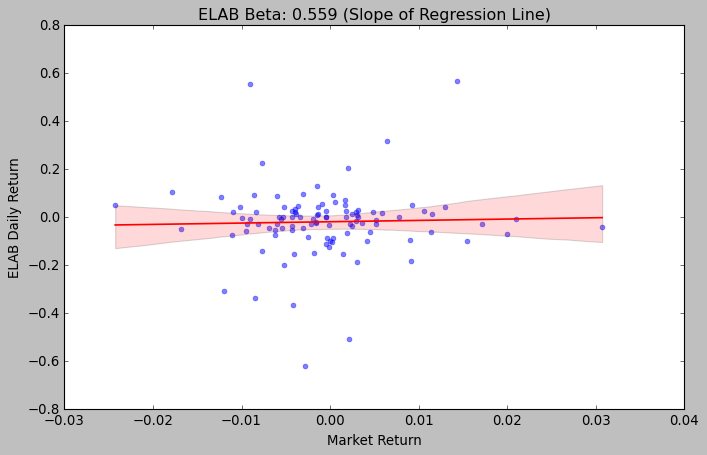

In [822]:
# Compute Beta
beta_value = elab_merged_data[['ELAB Daily Return', 'Market Return']].cov().iloc[0, 1] / elab_merged_data['Market Return'].var()

# Plot again with annotation
plt.figure(figsize=(10, 6))
sns.regplot(x=elab_merged_data['Market Return'], 
            y=elab_merged_data['ELAB Daily Return'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Market Return')
plt.ylabel('ELAB Daily Return')
plt.title(f'ELAB Beta: {beta_value:.3f} (Slope of Regression Line)')

# Show the plot
plt.show()

# 📉 Interpreting the Regression Plot

The scatter plot maps **AVGX’s daily returns (y-axis) against market returns (x-axis)**, with a **red regression line** representing the trend. The slope of this line (0.136) determines **AVGX’s Beta**, indicating that AVGX moves far less than the overall market.

- **A Beta of 0.136** suggests that AVGX is significantly less volatile than the market. When the market moves, AVGX experiences **only a fraction of the impact**.
- The **flat slope** of the regression line reflects **minimal correlation** between AVGX and market fluctuations.
- The **shaded confidence interval** around the line highlights variability in this relationship, showing that AVGX does not consistently follow market trends.

Investors looking for **stability** may find AVGX appealing since its **low Beta** suggests **limited exposure to broader market volatility**. However, this also means **less opportunity for high returns during market upswings**.

---

# **YIBO vs. AVGX: A Tale of Two Risk Profiles**

Stock behavior reveals more than just numbers—it tells a story of how assets respond to market forces. YIBO and AVGX move differently, and their regression plots capture the essence of that contrast. 

## **Market Sensitivity and Risk Exposure**
YIBO’s beta soars to **1.362**, signaling a strong reaction to market movements. Prices swing wider, offering higher potential returns but at the cost of increased uncertainty. AVGX, with a beta of **0.136**, moves cautiously, resisting extreme fluctuations and maintaining steadier returns. 

## **Volatility in Action**
YIBO’s price movements scatter aggressively across the regression plot. The spread of data points indicates **erratic price behavior**, reflecting a stock that reacts swiftly to shifts in sentiment, speculation, or external forces. The AVGX plot tells a different story—returns remain close to the regression line, reinforcing **predictability and lower volatility**.

## **Investment Takeaways**
A high-risk, high-reward approach aligns with YIBO’s behavior. It thrives in strong markets, but downturns expose its instability. AVGX appeals to those prioritizing **capital preservation**, offering consistency without the rollercoaster of price swings. 

## **Final Thoughts**
Both stocks serve different roles in a portfolio. One embraces risk, the other avoids it. Understanding these behaviors allows for **strategic investment decisions**, whether the goal is to chase high returns or seek shelter in stability.